# Bird Song Analysis

This package is a port of the [Sound Analysis Toolbox for Matlab (SAT)](http://soundanalysispro.com/matlab-sat) in Python 3. It provides function to measure features of Zebra Finches songs, and to compare their similarities.

It does not give the exact same results as SAT, but gives qualitatively similar results. The variations in the results are due to the fact I removed some hackish code that was hard to port in Python.

# Imports

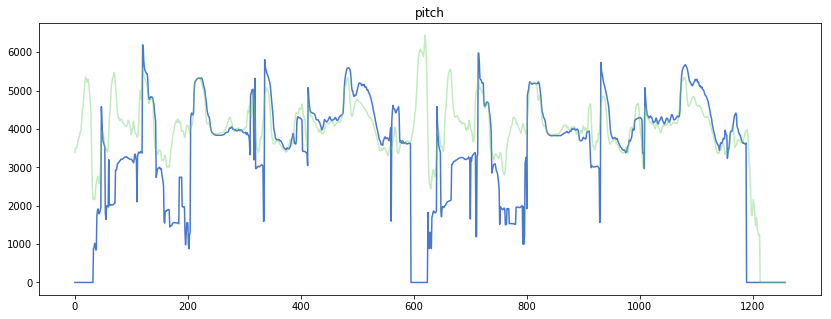

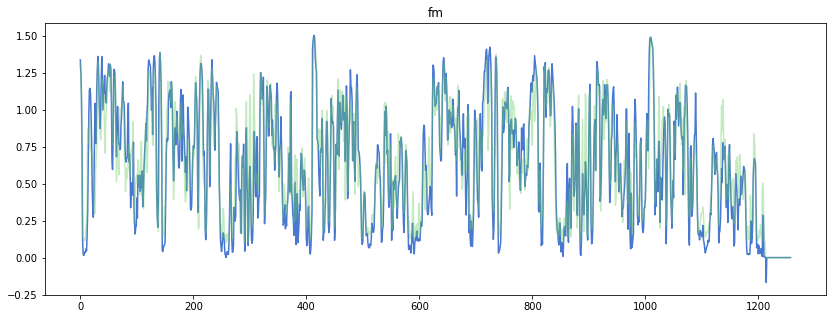

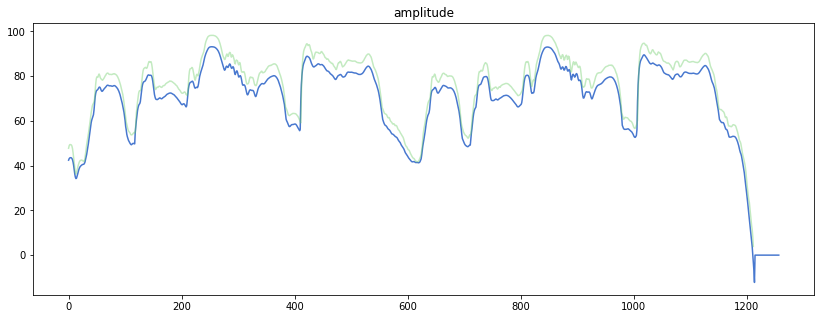

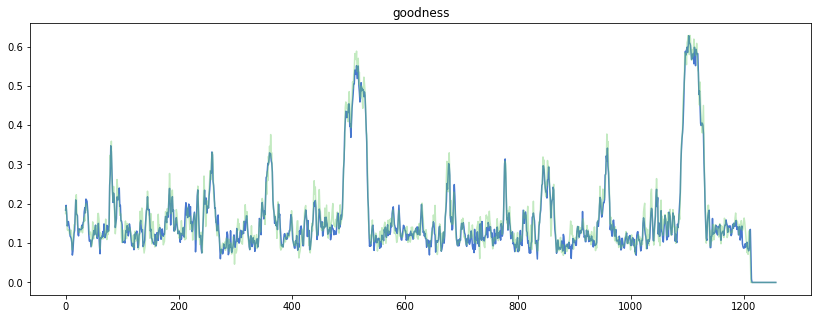

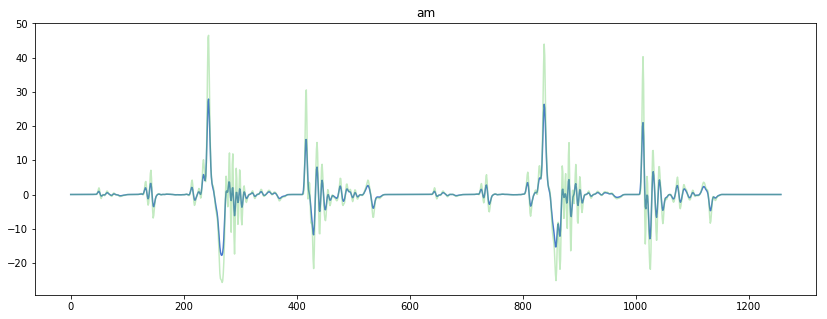

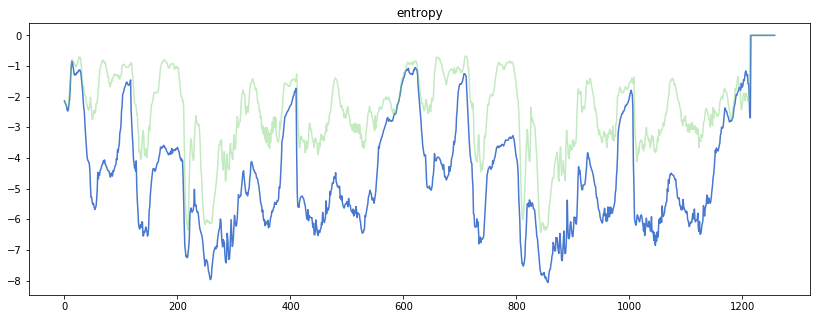

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.io import matlab

import birdsonganalysis as bsa

sns.set_palette('muted')

songname = 'simple'

sr, sig = wavfile.read('../songs/{}.wav'.format(songname))

sat = matlab.loadmat('../birdsonganalysis/tests/{}.mat'.format(songname),
                                  squeeze_me=True, struct_as_record=False)[songname]

sfeat =  bsa.all_song_features(sig, 44100, freq_range=256, fft_size=512, fft_step=40)
mfeat = {'am': sat.AM, 'amplitude': sat.amplitude, 'entropy': sat.entropy, 'fm': sat.FM, 'goodness': sat.goodness, 'pitch': sat.pitch}
for key in sfeat:
    if key == 'rms':
        continue
    plt.figure(figsize=(14, 5))
    plt.plot(sfeat[key])
    plt.plot(mfeat[key], alpha=0.4)
    plt.title(key)